In [4]:
# %load_ext autoreload
# %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
!pip install umap-learn[plot]

In [62]:
import os
import umap.plot
import umap.umap_ as umap
from collections import defaultdict
from ml4h.explorations import latent_space_dataframe,stratify_and_project_latent_space,plot_nested_dictionary,iterative_subspace_removal

In [ ]:
#code to copy files from google cloud
# !gsutil cp gs://fc-e5ea247f-18af-45e4-825a-71f0537e3cb7/hidden_ecg_rest_median_raw_10_dropout_pair_contrastive_lax_4ch_cycle_ecg_median_10_pretrained_256d_v2020_06_07.tsv latent_file.tsv
    

# !gsutil cp gs://fc-e5ea247f-18af-45e4-825a-71f0537e3cb7/tensors_all_union.csv tensors_all_union.csv
    
# !gsutil cp gs://fc-e5ea247f-18af-45e4-825a-71f0537e3cb7/hidden_lax_4ch_heart_center_dropout_pair_contrastive_lax_4ch_cycle_ecg_median_10_pretrained_256d_v2020_06_07.tsv latent_file_for_comparison.tsv

In [45]:
# Loading file path from local dir, gsutil cp was not working but you can try gsutil
ml4h_dir = os.path.dirname(os.getcwd())
latent_file = os.path.join(ml4h_dir,"latent_data_test/latent_file.tsv")
latent_file_for_comparison = os.path.join(ml4h_dir,"latent_data_test/latent_file_for_comparison.tsv")
label_file = os.path.join(ml4h_dir,"latent_data_test/tensors_all_union.csv") 

In [63]:
# defining categorical and continuous covariates variables
categorical_covariates = ['Sex_Male_0_0',
 'atrial_fibrillation_or_flutter',
 'coronary_artery_disease',
 'diabetes_type_2',
 'hypercholesterolemia',
 'hypertension',
 'Sinus_bradycardia',
 'Marked_sinus_bradycardia',
 'Other_sinus_rhythm']

continuous_covariates = ['age', 'bmi', 'RRInterval', 'QTInterval', 'LVM', 'RVEDV', 'PC1', 'PC2', 'PC3']

all_scores = defaultdict(dict)


In [64]:
continuous_covariates

['age', 'bmi', 'RRInterval', 'QTInterval', 'LVM', 'RVEDV', 'PC1', 'PC2', 'PC3']

In [65]:
#renaming columns of latent file
col_rename = {f'22009_Genetic-principal-components_0_{i}': f'PC{i}' for i in range(1,41)}
col_rename['Genetic-sex_Male_0_0'] = 'sex'
col_rename['21003_Age-when-attended-assessment-centre_2_0'] = 'age'
col_rename['21001_Body-mass-index-BMI_2_0'] = 'bmi'

# ECG Inferences from contrasive paired model

In [66]:
latent_df = latent_space_dataframe(latent_file, label_file)
latent_df = latent_df.rename(columns=col_rename)
latent_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
0,-13.040499,5.09869,-0.941436,1.10853,-1.113140,-0.551117,0.108314,0.384301,-1.836240,0.841757,...,0.357947,0.572839,-0.151002,-0.141661,-0.005667,-0.119862,-0.850965,-0.756585,-0.147475,-0.007641
1,-16.290900,1.73394,-3.384810,2.69792,0.750705,-1.378500,-3.941310,-2.645830,3.677180,1.559660,...,-0.120125,-0.580071,-0.149421,-0.140083,-0.004279,0.092604,0.947224,0.245169,-0.145886,-0.006162
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.308097,1.045822,-0.201392,-0.191949,-0.049913,0.289472,-0.622445,0.984579,-0.198128,-0.054796
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.501217,-0.023139,-0.136885,-0.127572,0.006729,-0.030844,0.685641,0.009245,-0.133284,0.005570
4,-11.620700,5.15124,-1.085570,-2.52474,-2.436100,-1.334970,1.850050,1.236000,-0.165032,-2.820240,...,0.368554,0.684087,-0.157703,-0.148348,-0.011551,-0.086389,-0.356414,-0.425291,-0.154212,-0.013912


In [70]:
latent_dimension = 256
latent_cols = [f'latent_{i}' for i in range(latent_dimension)]
for c in categorical_covariates:
    all_scores['DropFuse ECG'].update(stratify_and_project_latent_space(c, 1, 0, latent_cols, latent_df))
for c in continuous_covariates:
    all_scores['DropFuse ECG'].update(stratify_and_project_latent_space(c, latent_df[c].median(), 
                                                                        0, latent_cols, latent_df))
# all_scores    

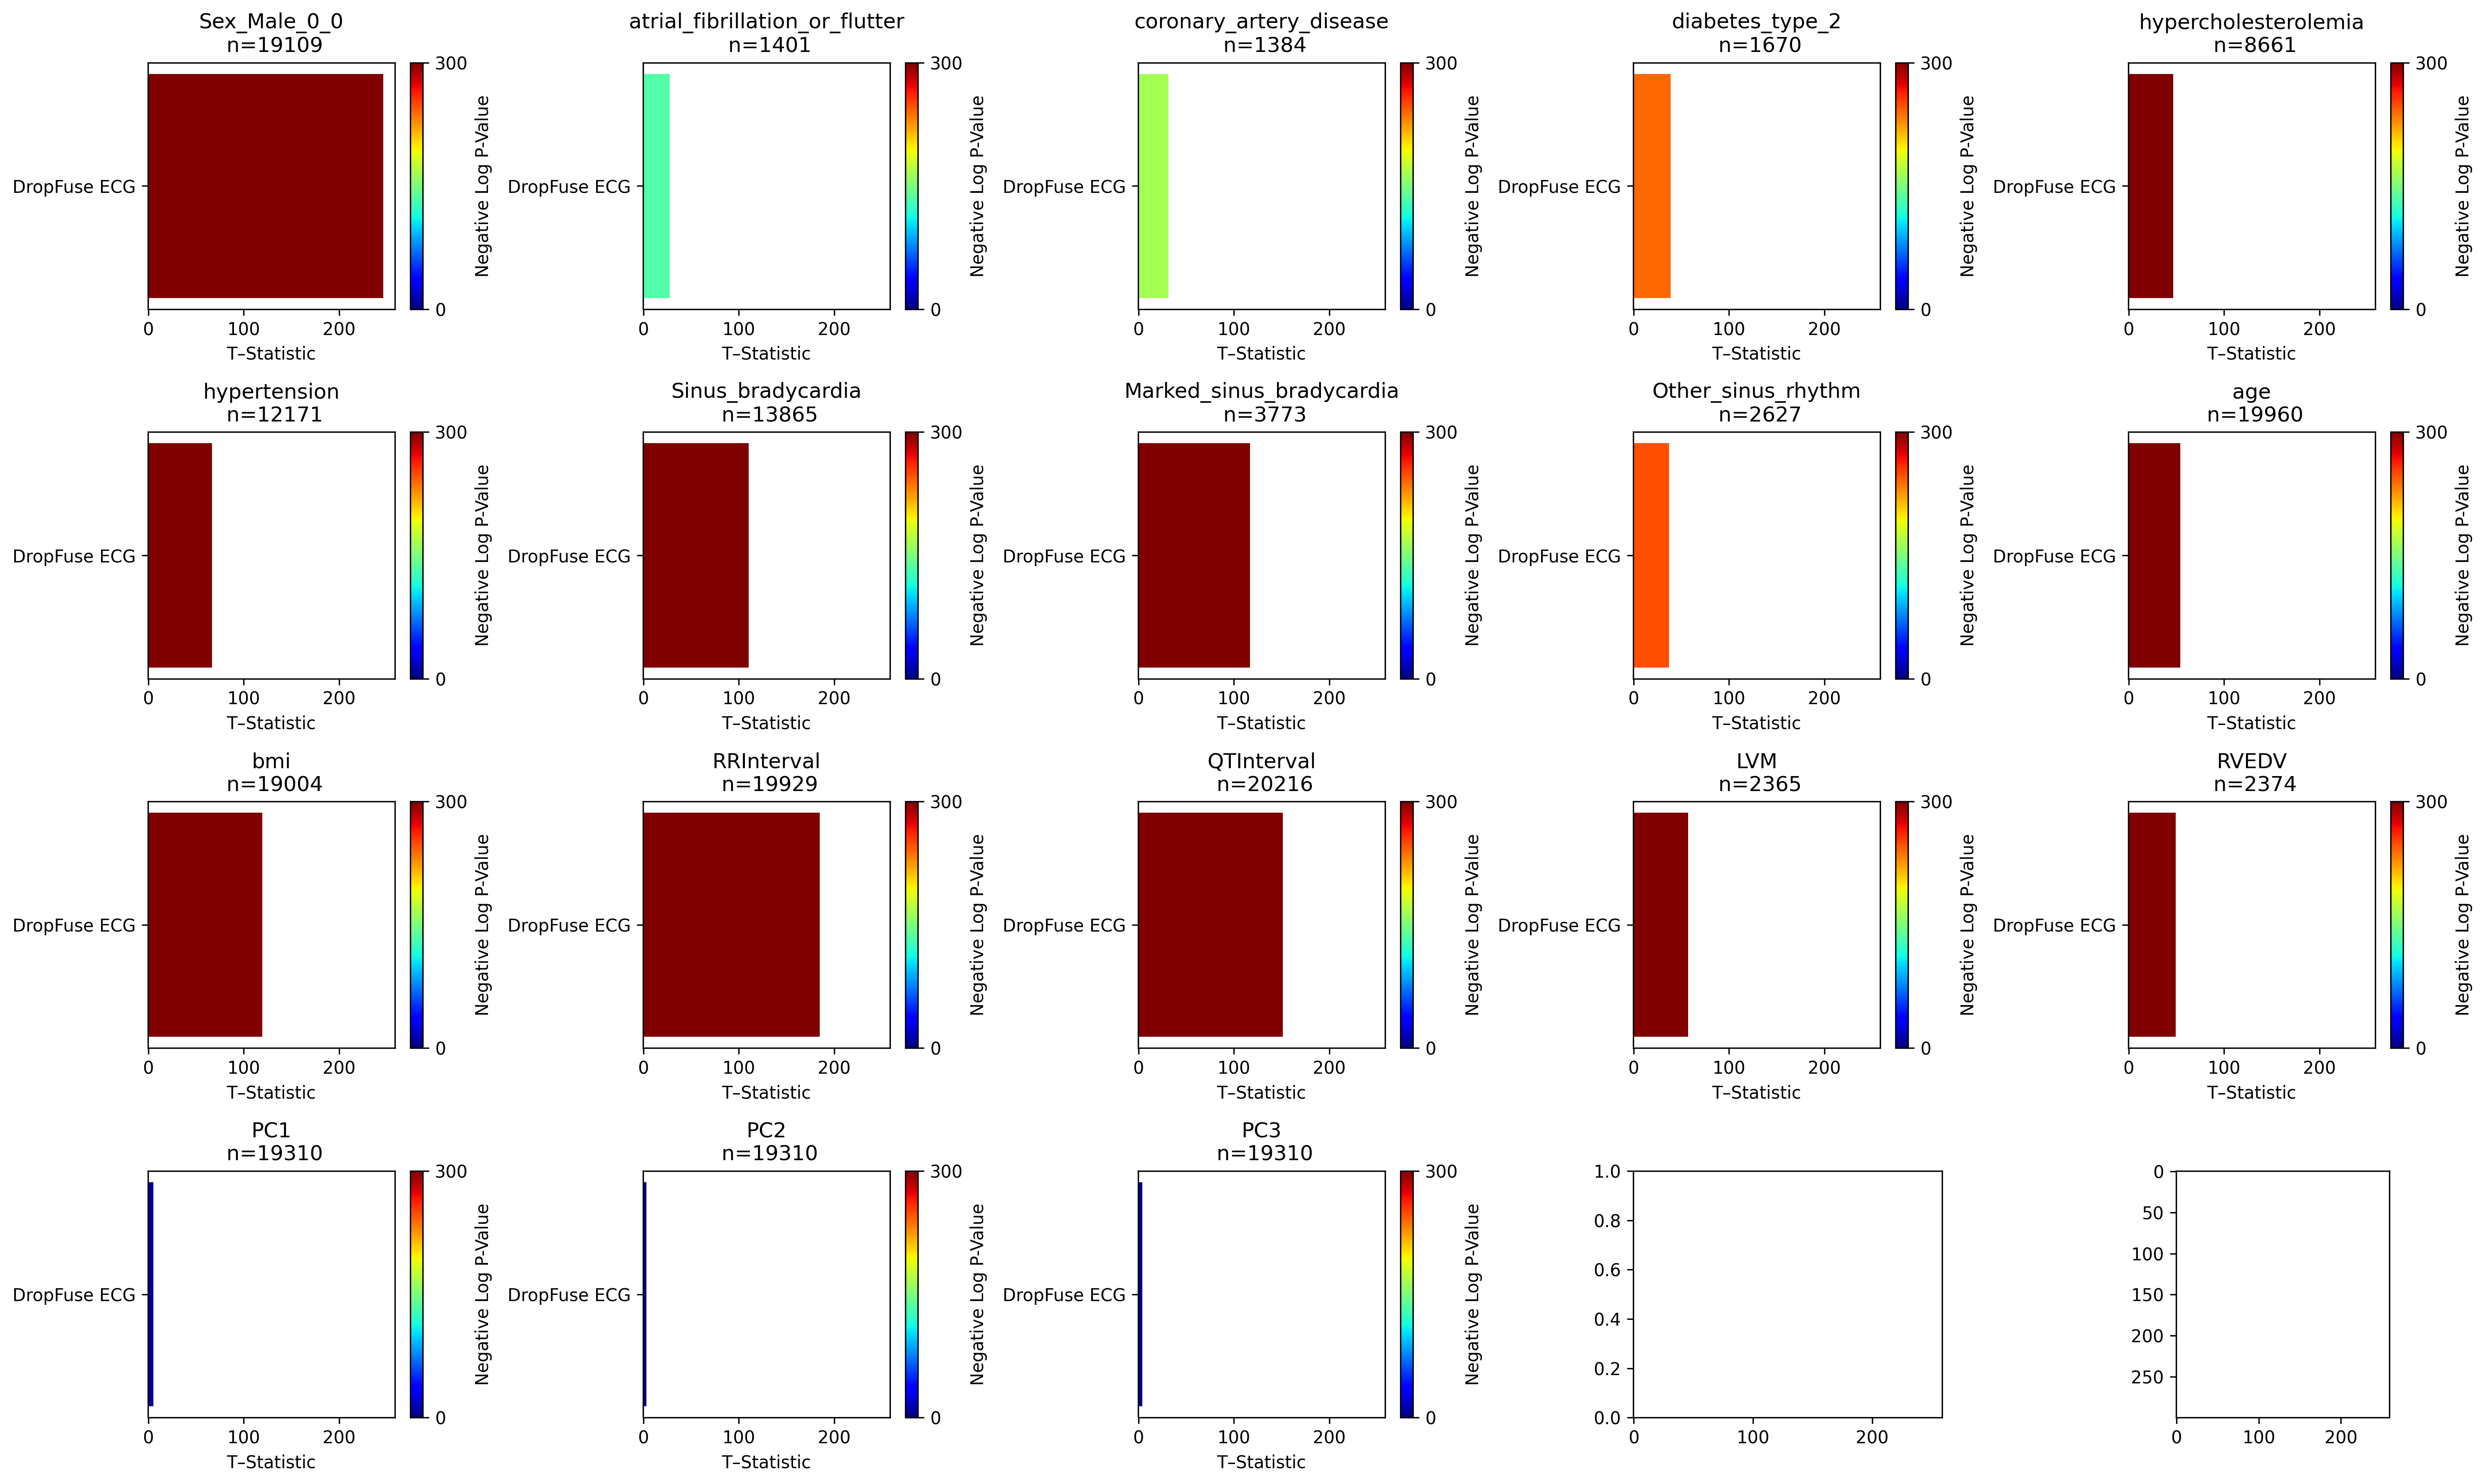

In [71]:
plot_nested_dictionary(all_scores)

# MRI Inferences from contrasive paired model

In [72]:
# loading latent space file
latent_df = latent_space_dataframe(latent_file_for_comparison, label_file)
latent_dimension = 256
latent_cols = [f'latent_{i}' for i in range(latent_dimension)]
latent_df = latent_df.rename(columns=col_rename)
for c in categorical_covariates:
    all_scores['DropFuse MRI'].update(stratify_and_project_latent_space(c, 1, 0, latent_cols, latent_df))
for c in continuous_covariates:
    all_scores['DropFuse MRI'].update(stratify_and_project_latent_space(c, latent_df[c].median(), 
                                                                        0, latent_cols, latent_df))


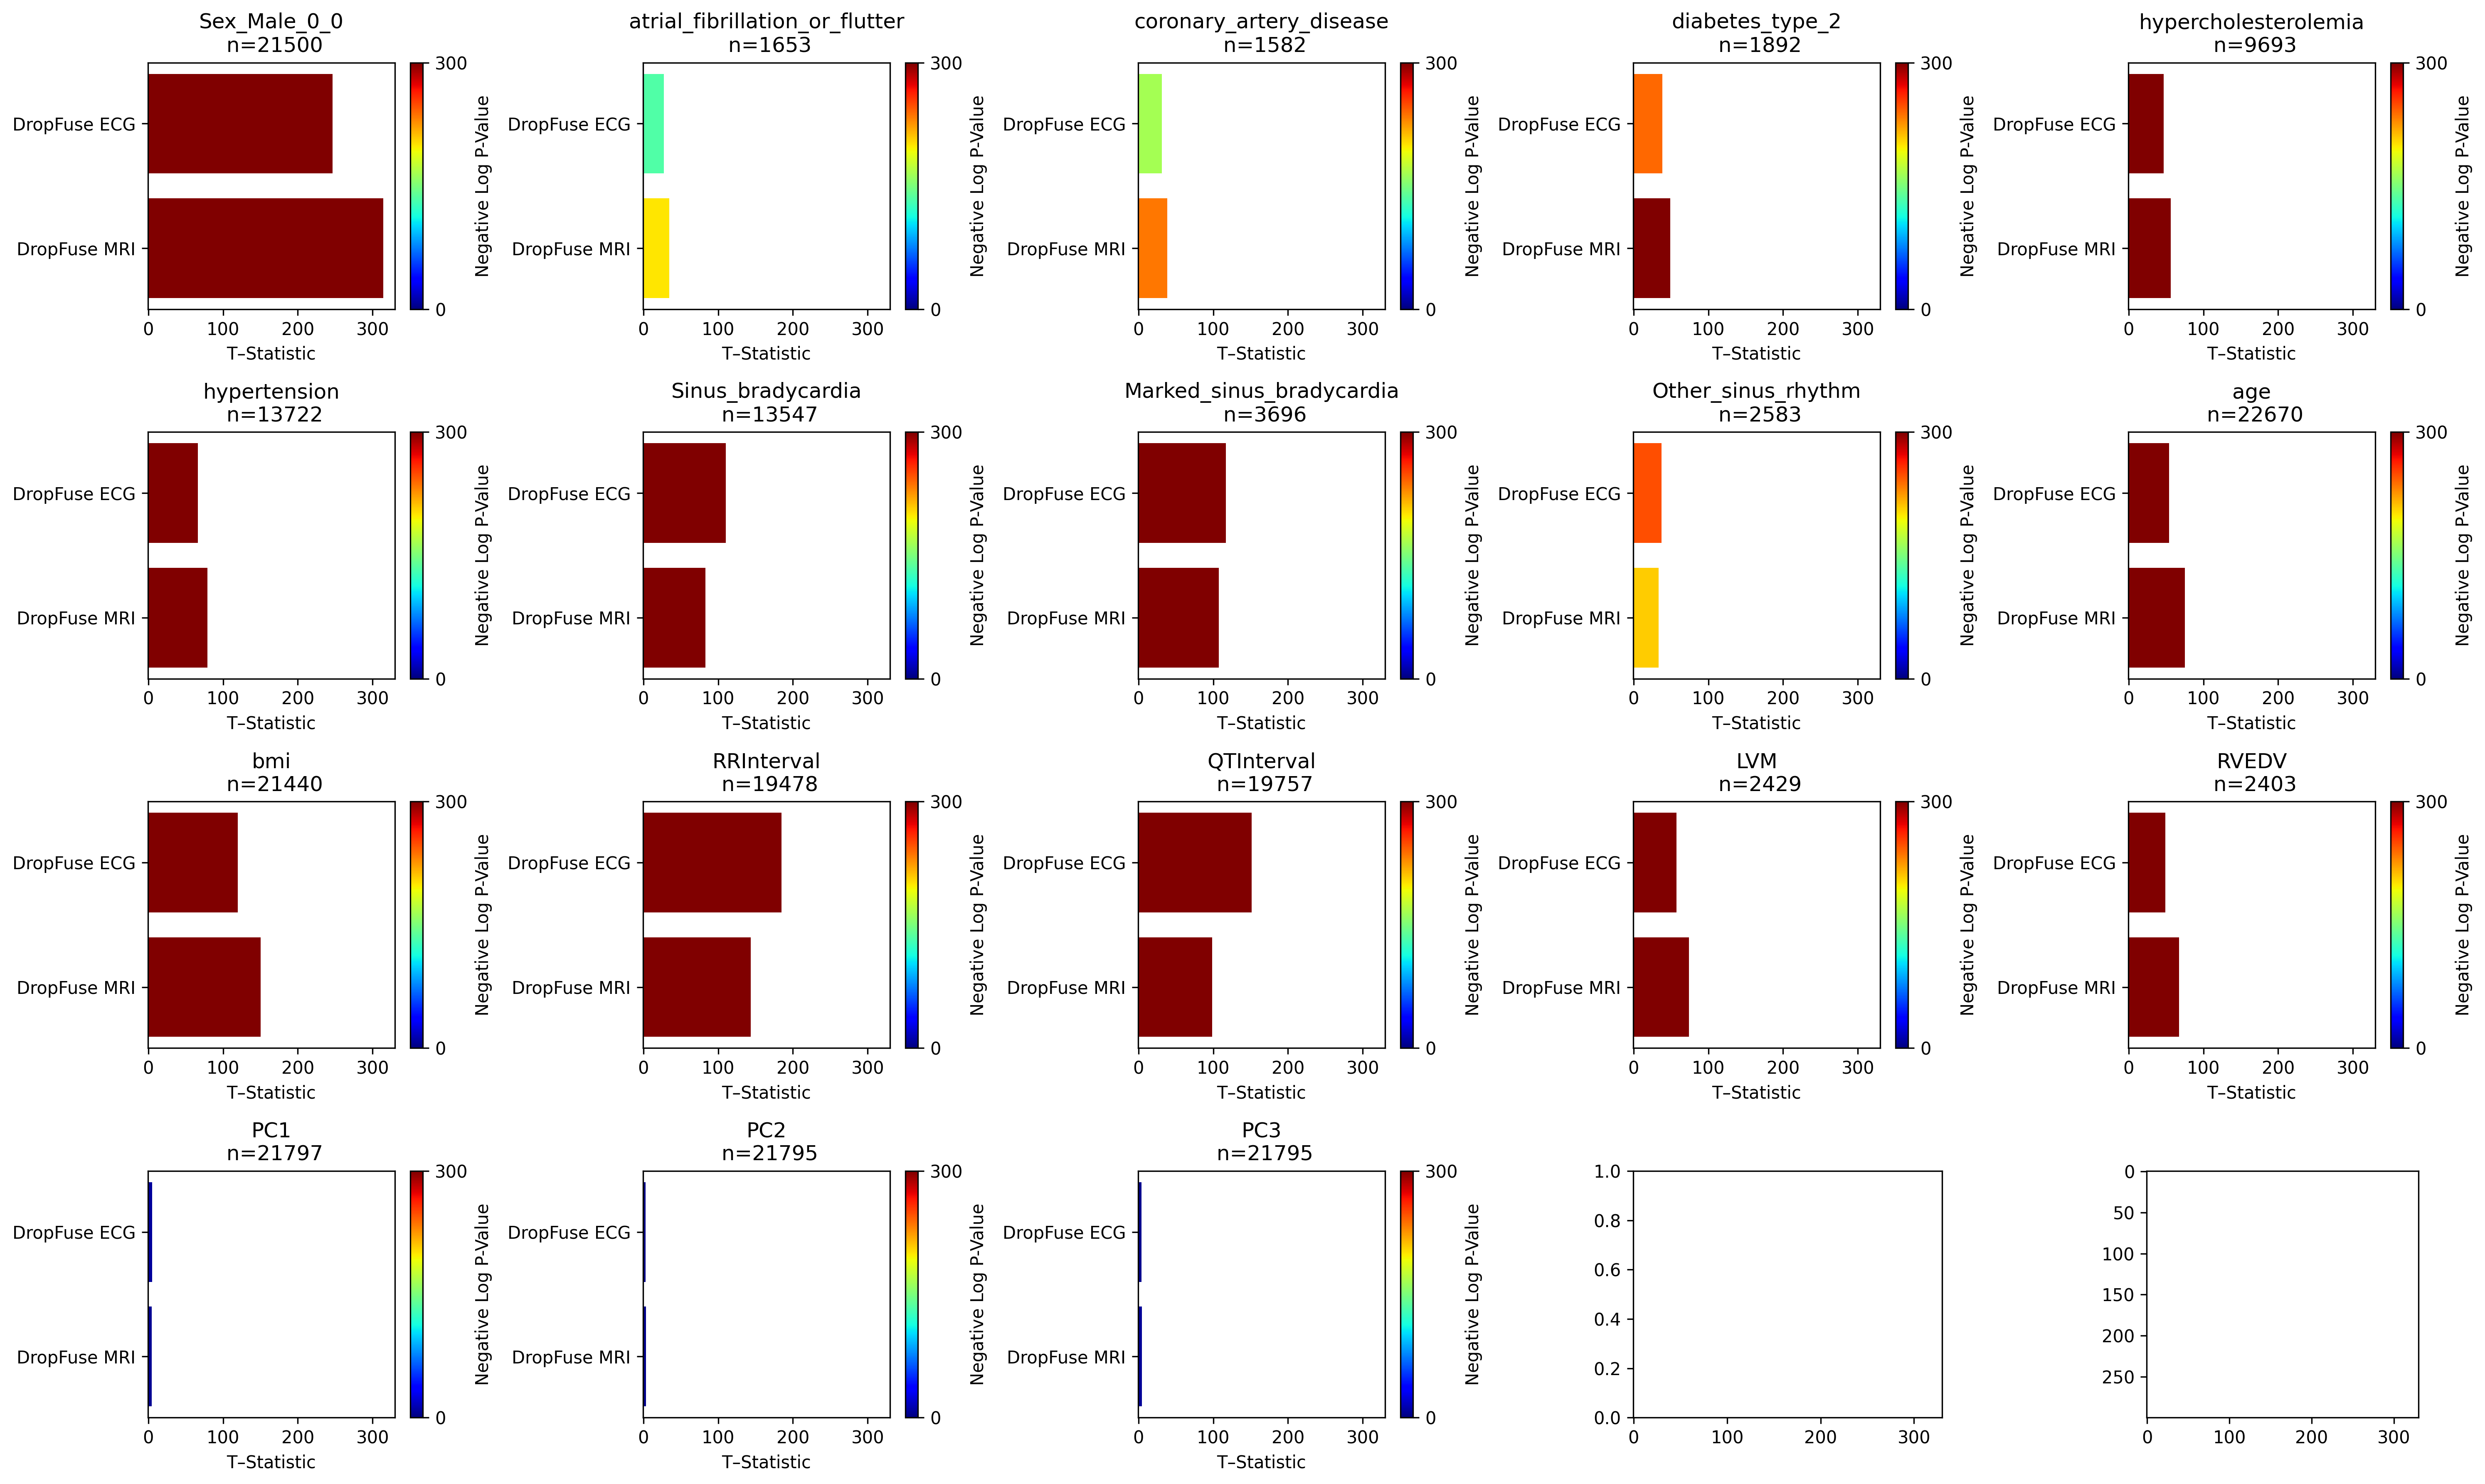

In [73]:
plot_nested_dictionary(all_scores)

In [74]:
space = latent_df[latent_cols].to_numpy()
umapped = umap.UMAP().fit_transform(space)
print(umapped.shape)
print(latent_df['Sex_Male_0_0'].to_numpy().shape)

(44643, 2)
(44643,)


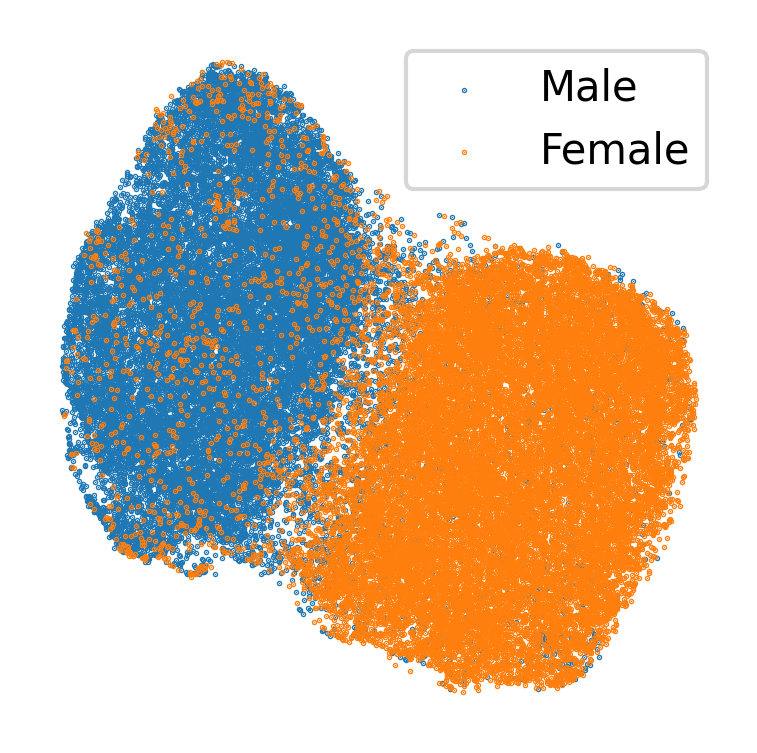

In [75]:
fig, ax = plt.subplots(figsize=(3,3), dpi=300)
ax.scatter(umapped[latent_df['Sex_Male_0_0'].to_numpy()==1,0], 
           umapped[latent_df['Sex_Male_0_0'].to_numpy()==1,1], s=.1, label='Male')
ax.scatter(umapped[latent_df['Sex_Male_0_0'].to_numpy()==0,0], 
           umapped[latent_df['Sex_Male_0_0'].to_numpy()==0,1], s=.1, label='Female')
ax.axis("off")
ax.legend()

In [76]:
r2_thresh = 0.01
adjust_cols = ['Sex_Male_0_0']
new_cols, latent_df = iterative_subspace_removal(adjust_cols, latent_df, latent_cols, r2_thresh=r2_thresh)

Scores were {'Sex_Male_0_0': 0.7758}, remaining columns are ['Sex_Male_0_0']
After iteration 1 Space shape is: (44643, 255)
Scores were {'Sex_Male_0_0': 0.7755}, remaining columns are ['Sex_Male_0_0']
After iteration 2 Space shape is: (44643, 254)
Scores were {'Sex_Male_0_0': 0.7747}, remaining columns are ['Sex_Male_0_0']
After iteration 3 Space shape is: (44643, 253)
Scores were {'Sex_Male_0_0': 0.774}, remaining columns are ['Sex_Male_0_0']
After iteration 4 Space shape is: (44643, 252)
Scores were {'Sex_Male_0_0': 0.7736}, remaining columns are ['Sex_Male_0_0']
After iteration 5 Space shape is: (44643, 251)
Scores were {'Sex_Male_0_0': 0.773}, remaining columns are ['Sex_Male_0_0']
After iteration 6 Space shape is: (44643, 250)
Scores were {'Sex_Male_0_0': 0.772}, remaining columns are ['Sex_Male_0_0']
After iteration 7 Space shape is: (44643, 249)
Scores were {'Sex_Male_0_0': 0.7718}, remaining columns are ['Sex_Male_0_0']
After iteration 8 Space shape is: (44643, 248)
Scores were

Scores were {'Sex_Male_0_0': 0.5985}, remaining columns are ['Sex_Male_0_0']
After iteration 67 Space shape is: (44643, 189)
Scores were {'Sex_Male_0_0': 0.5953}, remaining columns are ['Sex_Male_0_0']
After iteration 68 Space shape is: (44643, 188)
Scores were {'Sex_Male_0_0': 0.5785}, remaining columns are ['Sex_Male_0_0']
After iteration 69 Space shape is: (44643, 187)
Scores were {'Sex_Male_0_0': 0.5738}, remaining columns are ['Sex_Male_0_0']
After iteration 70 Space shape is: (44643, 186)
Scores were {'Sex_Male_0_0': 0.5672}, remaining columns are ['Sex_Male_0_0']
After iteration 71 Space shape is: (44643, 185)
Scores were {'Sex_Male_0_0': 0.5583}, remaining columns are ['Sex_Male_0_0']
After iteration 72 Space shape is: (44643, 184)
Scores were {'Sex_Male_0_0': 0.5413}, remaining columns are ['Sex_Male_0_0']
After iteration 73 Space shape is: (44643, 183)
Scores were {'Sex_Male_0_0': 0.5279}, remaining columns are ['Sex_Male_0_0']
After iteration 74 Space shape is: (44643, 182)


In [77]:
new_space = latent_df[new_cols].to_numpy()
umapped_debias = umap.UMAP().fit_transform(new_space)

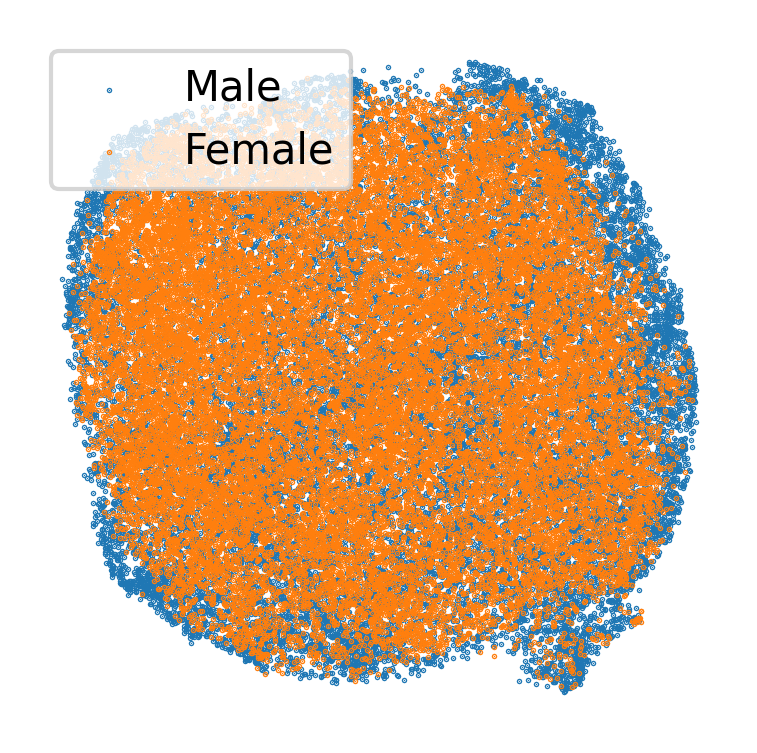

In [78]:
fig, ax = plt.subplots(figsize=(3,3), dpi=300)
ax.scatter(umapped_debias[latent_df['Sex_Male_0_0'].to_numpy()==1,0], 
           umapped_debias[latent_df['Sex_Male_0_0'].to_numpy()==1,1], s=.1, label='Male')
ax.scatter(umapped_debias[latent_df['Sex_Male_0_0'].to_numpy()==0,0], 
           umapped_debias[latent_df['Sex_Male_0_0'].to_numpy()==0,1], s=.1, label='Female')
ax.axis("off")
ax.legend()